In [1]:
import numpy as np

from utils import plot_data, return_best_chi2dof, plot_ref_data

from matplotlib import pyplot as plt
from matplotlib import container

from tests import fused_p, fused_t, min_p, avg_p, Zscore, fusion, p_to_z, emp_pvalues, emp_pvalue, bootstrap_pval, power

## nplm-fuse

In [2]:
ref_folder = "/home/marcol/multiple-testing-nplm/output_1d/Ntoys1000_NR200000_NB2000_null"
data_folder = "/home/marcol/multiple-testing-nplm/output_1d/Ntoys300_NR200000_NB2000_NS10_loc6.4_std0.16"

In [3]:
 #10,25,50,75,90,95 percentiles
ref = np.load(ref_folder+"/t_array.npy")
data = np.load(data_folder+"/t_array.npy")

In [4]:
# [0.1, 0.3, 0.7, 1.4, 2.4, 3.0]
#   10,25,50,75,90,95
for i in range(ref.shape[1]):
    print(np.median(Zscore(ref[:,i],data[:,i])))

1.4157772082556512
2.0339360665588795
2.4092803121479585
2.3659881908322924
2.17048623927378
2.197678454649643


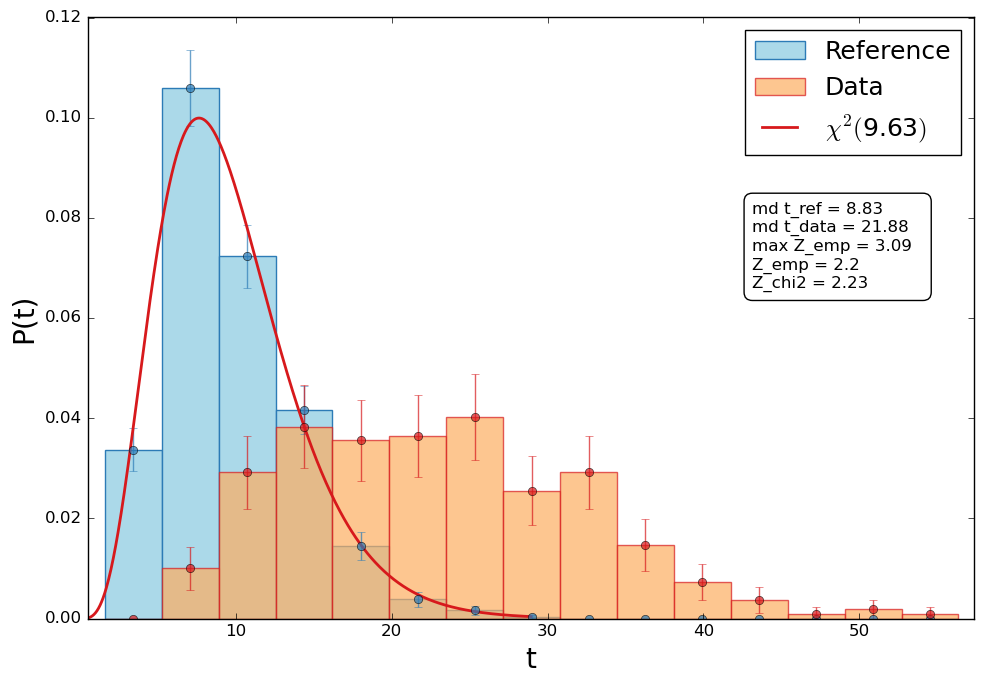

In [5]:
plot_ref_data(ref[:,4],data[:,4],bins=15,dof=round(return_best_chi2dof(ref[:10000,4])[0],2))

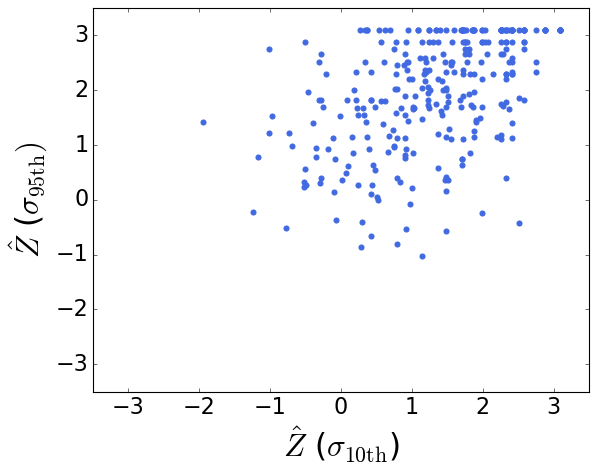

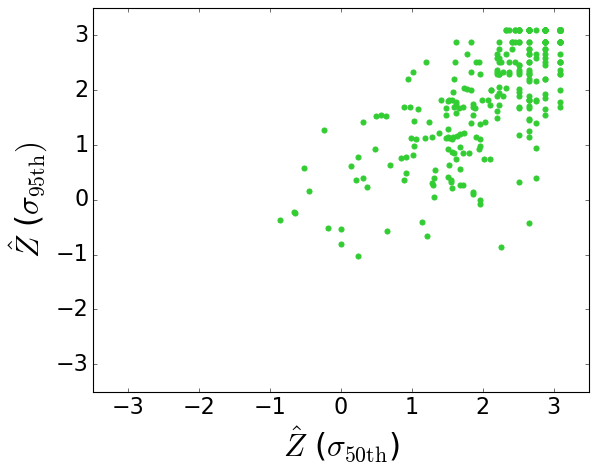

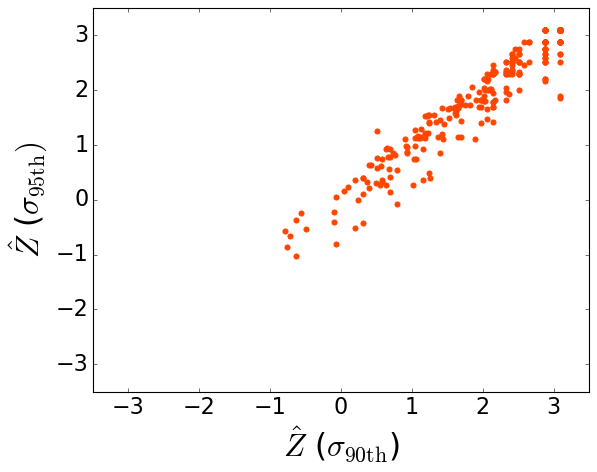

In [6]:
# scatter plots

plt.scatter(Zscore(ref[:,0],data[:,0]),Zscore(ref[:,5],data[:,5]), color='royalblue')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel(r'$\hat{Z}$ ($\sigma_{10\rm{th}}$)', fontsize=28)
plt.ylabel(r'$\hat{Z}$ ($\sigma_{95\rm{th}})$', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.scatter(Zscore(ref[:,2],data[:,2]),Zscore(ref[:,5],data[:,5]),color="limegreen")
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel(r'$\hat{Z}$ ($\sigma_{50\rm{th}}$)', fontsize=28)
plt.ylabel(r'$\hat{Z}$ ($\sigma_{95\rm{th}})$', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.scatter(Zscore(ref[:,4],data[:,4]),Zscore(ref[:,5],data[:,5]), color='orangered')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel(r'$\hat{Z}$ ($\sigma_{90\rm{th}}$)', fontsize=28)
plt.ylabel(r'$\hat{Z}$ ($\sigma_{95\rm{th}})$', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [5]:
for T in [0.001, 1, 10, 100, 1000, 1e5, 1e10]:
    print(np.median(p_to_z((fused_t(ref,data,T)))))

1.4157772082556512
1.4157772082556512
1.4157772082556512
2.044048903933493
2.457622404408886
2.457622404408886
2.457622404408886


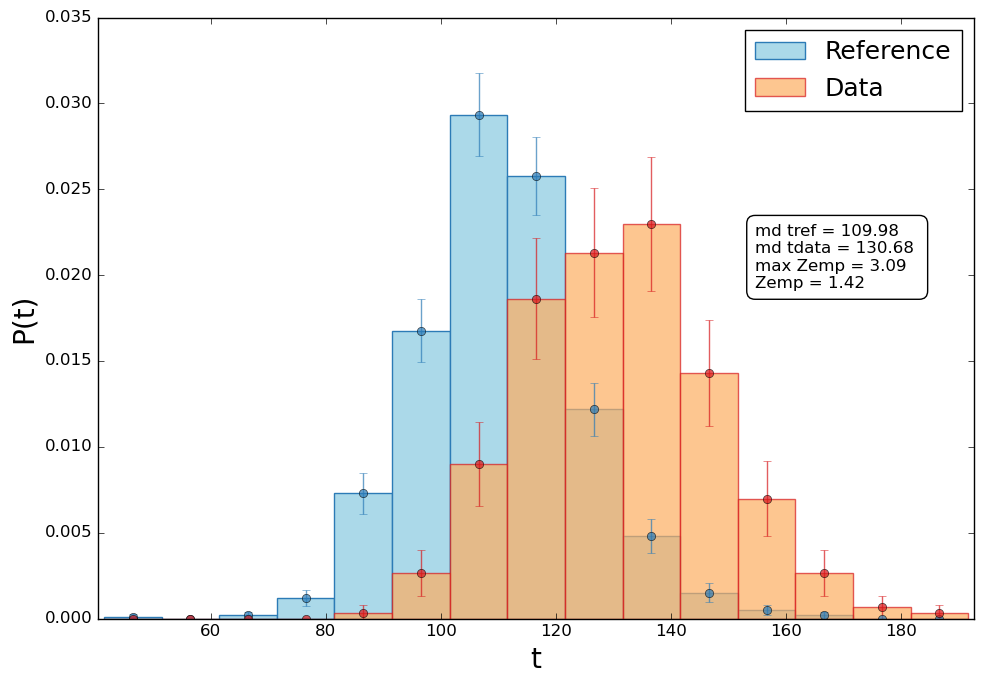

In [6]:
plot_ref_data(fusion(ref,1),fusion(data,1),bins=15)

In [8]:
bootstrap_minp = []
for i in range(20):
    pmin_ref, pmin_data =  min_p(ref,data,rng=i)
    bootstrap_minp.append(np.abs(np.median(Zscore(pmin_ref,pmin_data))))

print(np.mean(bootstrap_minp),
np.std(bootstrap_minp))

2.3668615584219403 0.13730483262751592


In [25]:
pvals_min_p_ref = []
for idx, el in enumerate(np.transpose(pmin_ref)):
        pvals_min_p_ref.append(bootstrap_pval(np.delete(pmin_ref,idx),el))
#pvals_ref_min = [bootstrap_pval(np.delete(col,idx),el) for el in col]
        
pvals_min_p_data = emp_pvalues(pmin_ref,pmin_data)

In [26]:
np.max(pvals_min_p_ref)

1.0

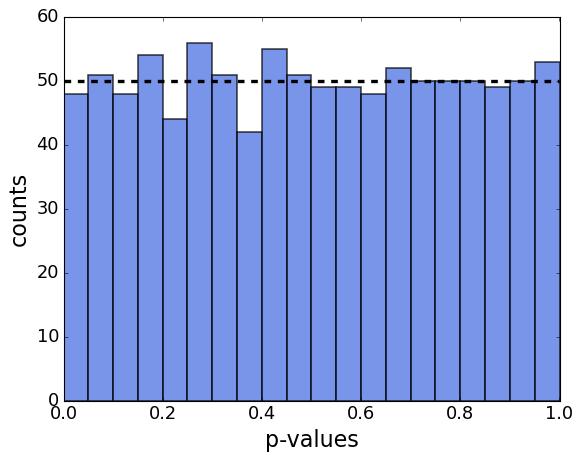

In [59]:
bins=np.linspace(0,1,21)
plt.hist(pvals_min_p_ref,bins=bins, density=False, color='royalblue', alpha=0.7, lw=1.5)#,  label='Null')
#plt.hist(pvals_min_p_data,bins=bins, density=False, histtype='step', edgecolor='k', hatch='/', lw=1.5, fill=False, label='Alternative')
plt.hlines(50, 0, 1, colors='k', linestyles='--', lw=3)
plt.xlabel("p-values", fontsize=20)
plt.ylabel("counts", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim((0.5,1.5))
#plt.legend(loc=0, fontsize=20)
plt.show()

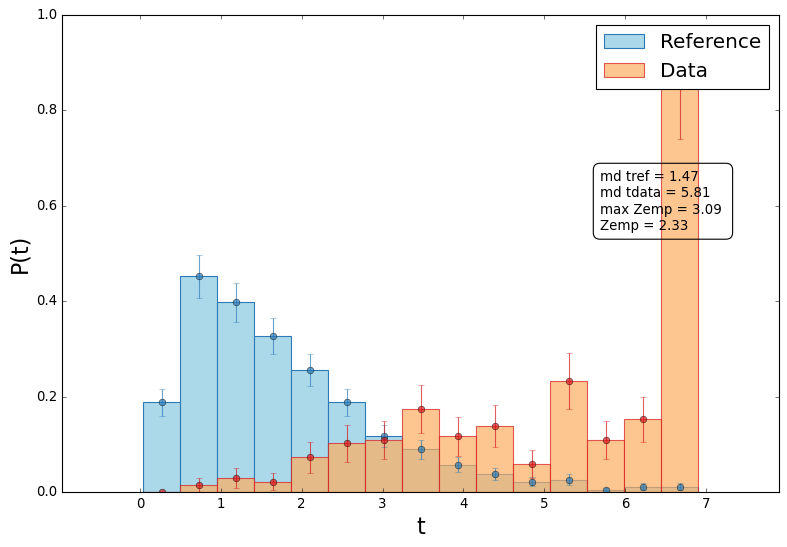

In [28]:
plot_ref_data(pmin_ref,pmin_data,bins=15)

In [24]:
for T in [1e-3, 0.1, 1, 100, 1000]:
    fused_p_ref, fused_p_data = fused_p(ref,data,T)
    print(np.median(Zscore(fused_p_ref,fused_p_data)))

2.197678454649643
2.4092803121479585
2.2907474943568866
2.2575132263176205
2.2907474943568866


In [25]:
bootstrap_fusedp1 = []
for i in range(20):
    fused_p_ref, fused_p_data = fused_p(ref,data,T=1,seed=i)
    bootstrap_fusedp1.append(np.median(Zscore(fused_p_ref,fused_p_data)))

print(np.mean(bootstrap_fusedp1),
np.std(bootstrap_fusedp1))

2.29173544891829 0.039820922485319835


In [26]:
avg_p_ref, avg_p_data = avg_p(ref,data)
print(np.median(Zscore(avg_p_ref, avg_p_data)))

2.242056560778842


In [27]:
bootstrap_avgp = []
for i in range(20):
    avg_p_ref, avg_p_data = avg_p(ref,data,seed=i)
    bootstrap_avgp.append(np.median(Zscore(avg_p_ref, avg_p_data)))

print(np.mean(bootstrap_avgp),
np.std(bootstrap_avgp))

2.3013102636852913 0.039263065460676615


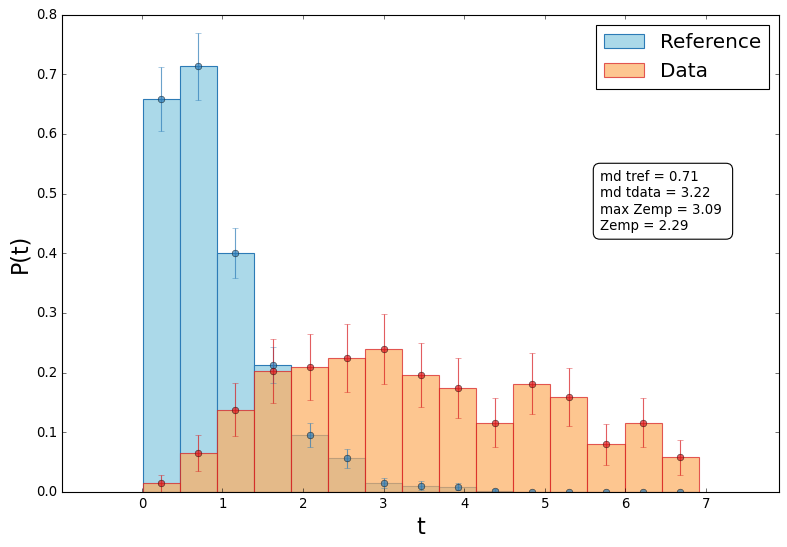

In [75]:
fused_p1_ref, fused_p1_data = fused_p(ref,data,T=1)
plot_ref_data(fused_p1_ref,fused_p1_data,bins=15)

In [62]:
pvals_fused_p_ref = []
for idx, el in enumerate(np.transpose(fused_p_ref)):
        pvals_fused_p_ref.append(bootstrap_pval(np.delete(fused_p_ref,idx),el))
pvals_fused_p_ref = np.array(pvals_fused_p_ref)
pvals_fused_p_ref[pvals_fused_p_ref==0.]=0.001
pvals_fused_p_ref = -np.log(pvals_fused_p_ref)

In [63]:
np.count_nonzero(pvals_fused_p_ref)

999

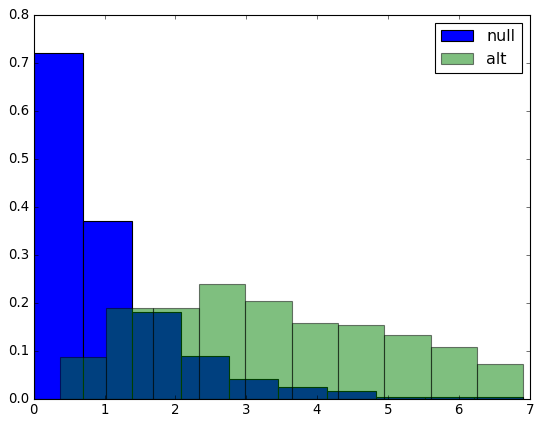

In [64]:
plt.hist(pvals_fused_p_ref,bins=10,density=True, label='null')
plt.hist(fused_p_data,bins=10,density=True, alpha=0.5, label='alt')
plt.legend(loc=0)
plt.show()

In [65]:
fused_p_ref, fused_p_data = fused_p(ref,data)
print(
    power(fusion(ref,1),fusion(data,1))[1],
    power(pmin_ref,pmin_data)[1],
    power(fused_p_ref,fused_p_data)[1],
    )

[0.78405316 0.63787375 0.45182724 0.26910299 0.089701  ] [0.96013289 0.87043189 0.73421927 0.6179402  0.46179402] [0.95016611 0.88372093 0.7807309  0.65448505 0.45847176]


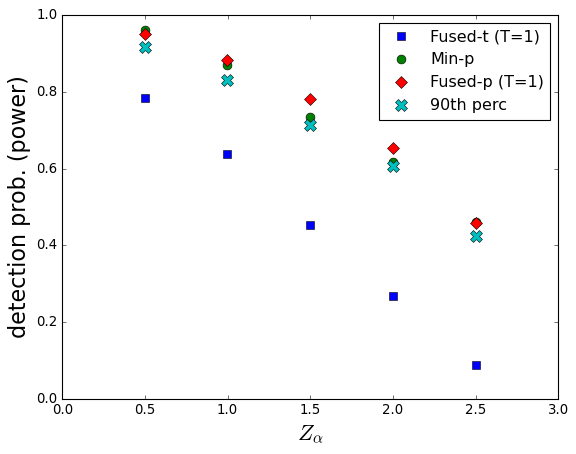

In [66]:
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(fusion(ref,1),fusion(data,1))[1],label='Fused-t (T=1)',linestyle='None',marker='s',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(pmin_ref,pmin_data)[1],label='Min-p',linestyle='None',marker='o',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(fused_p_ref,fused_p_data)[1],label='Fused-p (T=1)',linestyle='None',marker='D',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,-2],data[:,-2])[1],label='90th perc',linestyle='None',marker='X',ms=10)
plt.legend(numpoints=1, loc='best')
plt.xlabel(r'$Z_\alpha$', fontsize=20)
plt.ylabel('detection prob. (power)', fontsize=20)
plt.show()

## nplm-avg

In [67]:
ref_avg = np.load(ref_folder+"/t_avg_array.npy")
data_avg = np.load(data_folder+"/t_avg_array.npy")

ref_avg_exp = np.load(ref_folder+"/t_avg_exp_array.npy")
data_avg_exp = np.load(data_folder+"/t_avg_exp_array.npy")

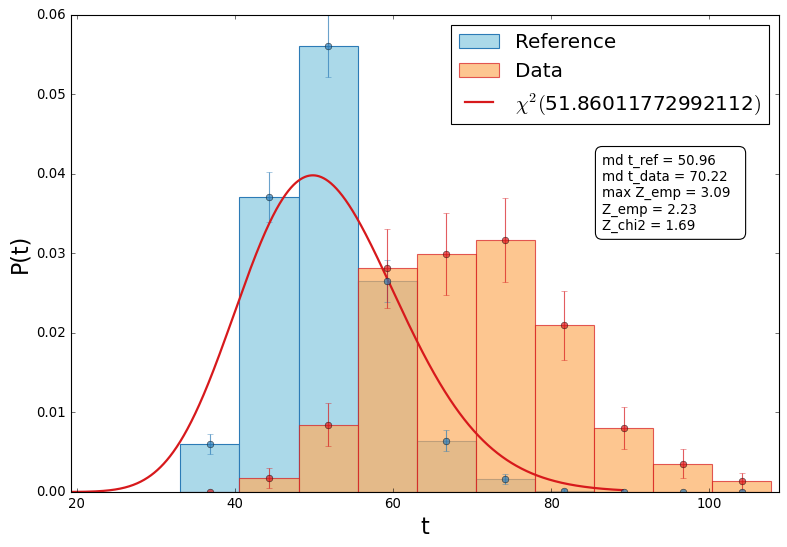

In [68]:
plot_ref_data(ref_avg,data_avg,dof=return_best_chi2dof(ref_avg[:50000])[0])

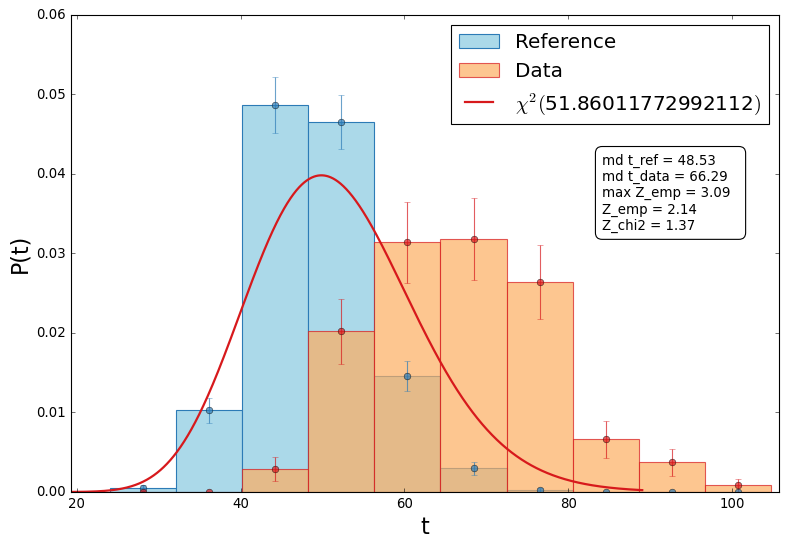

In [69]:
plot_ref_data(ref_avg_exp,data_avg_exp,dof=return_best_chi2dof(ref_avg[:50000])[0])

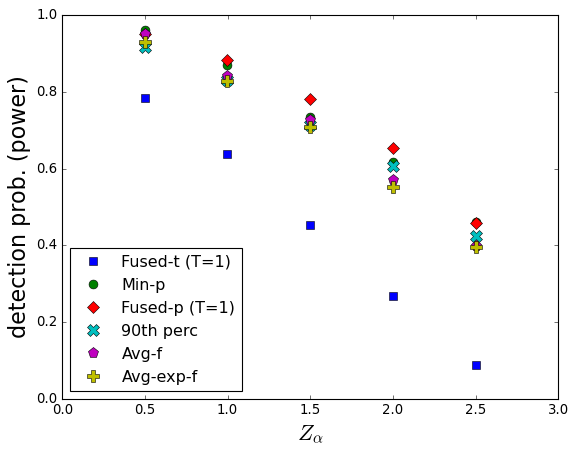

In [70]:
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(fusion(ref,1),fusion(data,1))[1],label='Fused-t (T=1)',linestyle='None',marker='s',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(pmin_ref,pmin_data)[1],label='Min-p',linestyle='None',marker='o',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(fused_p_ref,fused_p_data)[1],label='Fused-p (T=1)',linestyle='None',marker='D',ms=8)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,-2],data[:,-2])[1],label='90th perc',linestyle='None',marker='X',ms=10)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg,data_avg)[1],label='Avg-f',linestyle='None',marker='p',ms=10)
plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg_exp,data_avg_exp)[1],label='Avg-exp-f',linestyle='None',marker='P',ms=10)
plt.legend(numpoints=1, loc='best')
plt.xlabel(r'$Z_\alpha$', fontsize=20)
plt.ylabel('detection prob. (power)', fontsize=20)
plt.show()

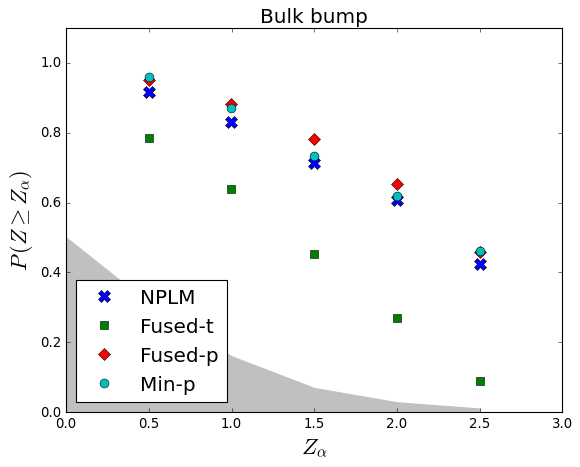

In [71]:
#plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(fusion(ref,1),fusion(data,1))[1],label='Fused-t (T=1)',linestyle='None',marker='s',ms=8)
plt.title("Bulk bump", fontsize=18)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,-2],data[:,-2])[1],label='NPLM',linestyle='None',marker='X',ms=10)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(fusion(ref,1),fusion(data,1))[1],label='Fused-t',linestyle='None',marker='s',ms=8)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(fused_p_ref,fused_p_data)[1],label='Fused-p',linestyle='None',marker='D',ms=8)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(pmin_ref,pmin_data)[1],label='Min-p',linestyle='None',marker='o',ms=8)
#plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg,data_avg)[1],label='Avg-f',linestyle='None',marker='p',ms=10)
#plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg_exp,data_avg_exp)[1],label='Avg-exp-f',linestyle='None',marker='P',ms=10)
plt.fill_between([0,0.49868686, 0.99857627, 1.49997839, 1.99907721, 2.50055179],[0.5,0.312, 0.16 , 0.069, 0.028, 0.01 ],color='silver')
plt.legend(numpoints=1, loc=3,fontsize=18)
plt.xlabel(r'$Z_\alpha$', fontsize=20)
plt.ylabel(r'$P\,(Z\geq Z_\alpha)$', fontsize=20)
plt.ylim((0,1.1))
plt.show()

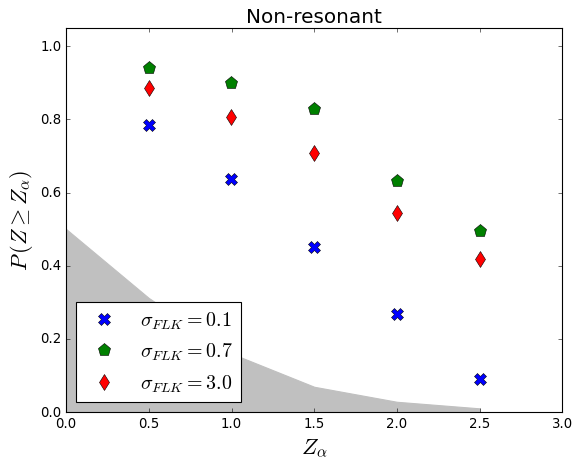

In [72]:
plt.title("Non-resonant", fontsize=18)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,0],data[:,0])[1],label=r'$\sigma_{FLK}=0.1$',linestyle='None',marker='X',ms=10)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,2],data[:,2])[1],label=r'$\sigma_{FLK}=0.7$',linestyle='None',marker='p',ms=12)
plt.errorbar(power(fusion(ref,1),fusion(data,1))[0],power(ref[:,5],data[:,5])[1],label=r'$\sigma_{FLK}=3.0$',linestyle='None',marker='d',ms=10)
#plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg,data_avg)[1],label='Avg-f',linestyle='None',marker='p',ms=10)
#plt.plot(power(fusion(ref,1),fusion(data,1))[0],power(ref_avg_exp,data_avg_exp)[1],label='Avg-exp-f',linestyle='None',marker='P',ms=10)
plt.fill_between([0,0.49868686, 0.99857627, 1.49997839, 1.99907721, 2.50055179],[0.5,0.312, 0.16 , 0.069, 0.028, 0.01 ],color='silver')
plt.legend(numpoints=1, loc=3,fontsize=18)
plt.xlabel(r'$Z_\alpha$', fontsize=20)
plt.ylabel(r'$P\,(Z\geq Z_\alpha)$', fontsize=20)
plt.ylim((0,1.05))
plt.show()

## export tests

In [74]:
#np.save(ref_folder+"/p_min.npy", pmin_ref)
#np.save(ref_folder+"/t_fused_1.npy", fusion(ref,1))
#np.save(ref_folder+"/p_fused_1.npy", fused_p_ref)

In [75]:
np.save(data_folder+"/p_min.npy", pmin_data)
np.save(data_folder+"/t_fused_1.npy", fusion(data,1))
np.save(data_folder+"/p_fused_1.npy", fused_p_data)

## tests

In [73]:
def errors(powers,data):
    return powers*np.sqrt(1./(np.array(powers)*len(data))+1./len(data))

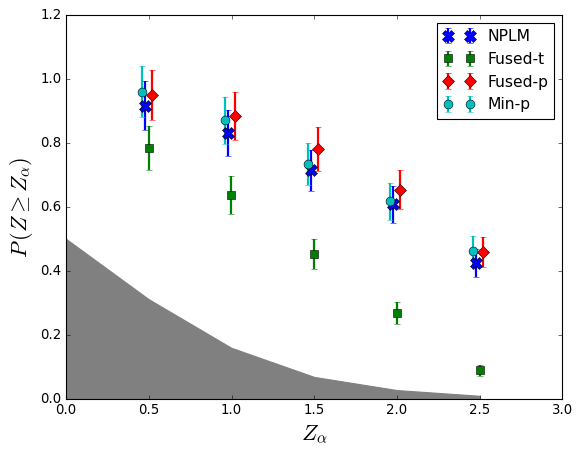

In [74]:
Z_a = [0.49868686, 0.99857627, 1.49997839, 1.99907721, 2.50055179]

plt.errorbar(np.array(Z_a)-0.02,power(ref[:,-2],data[:,-2])[1],yerr=errors(power(ref[:,-2],data[:,-2])[1],data[:,-2]),label='NPLM',linestyle='None',marker='X',ms=10,lw=2)
plt.errorbar(np.array(Z_a),power(fusion(ref,1),fusion(data,1))[1],yerr=errors(power(fusion(ref,1),fusion(data,1))[1],fusion(data,1)),label='Fused-t',linestyle='None',marker='s',ms=8,lw=2)
plt.errorbar(np.array(Z_a)+0.02,power(fused_p_ref,fused_p_data)[1],yerr=errors(power(fused_p_ref,fused_p_data)[1],fused_p_data),label='Fused-p',linestyle='None',marker='D',ms=8,lw=2)
plt.errorbar(np.array(Z_a)-0.04,power(pmin_ref,pmin_data)[1],yerr=errors(power(pmin_ref,pmin_data)[1],pmin_data),label='Min-p',linestyle='None',marker='o',ms=8,lw=2)
plt.fill_between([0]+Z_a,[0.5,0.312, 0.16 , 0.069, 0.028, 0.01 ],color='grey')
plt.legend(numpoints=2, loc='best',fontsize=14)
plt.xlabel(r'$Z_\alpha$', fontsize=20)
plt.ylabel(r'$P\,(Z\geq Z_\alpha)$', fontsize=20)
plt.show()

In [ ]:
ERRORS = POWERS*np.sqrt(1./(np.array(POWERS)*len(data[name]))+1./len(data[name]))

In [38]:
emp_p_value(ref[:,-2],data[:,-2])

array([0.687, 0.001, 0.376, 0.001, 0.044, 0.016, 0.048, 0.019, 0.001,
       0.005, 0.481, 0.001, 0.048, 0.309, 0.246, 0.246, 0.001, 0.001,
       0.085, 0.009, 0.128, 0.016, 0.025, 0.001, 0.174, 0.044, 0.001,
       0.244, 0.007, 0.001, 0.001, 0.713, 0.007, 0.055, 0.001, 0.023,
       0.131, 0.001, 0.001, 0.008, 0.001, 0.144, 0.047, 0.001, 0.214,
       0.001, 0.015, 0.001, 0.001, 0.231, 0.009, 0.015, 0.001, 0.009,
       0.027, 0.007, 0.346, 0.016, 0.146, 0.307, 0.001, 0.003, 0.015,
       0.019, 0.001, 0.039, 0.001, 0.053, 0.117, 0.001, 0.001, 0.284,
       0.001, 0.095, 0.146, 0.073, 0.001, 0.001, 0.001, 0.053, 0.001,
       0.018, 0.244, 0.08 , 0.001, 0.14 , 0.031, 0.376, 0.001, 0.064,
       0.001, 0.001, 0.001, 0.377, 0.001, 0.739, 0.001, 0.345, 0.001,
       0.117])

In [37]:
power(ref[:,-2],data[:,-2])[1]

array([0.9 , 0.81, 0.69, 0.56, 0.4 ])

In [99]:
seeds_1 = np.loadtxt("/home/marcol/nplm-fuse/output_1d/Ntoys300_NR200000_NB2000_NS90_nonres/seeds.txt",dtype=int)

In [100]:
seeds_2 = np.loadtxt("/home/marcol/nplm-fuse/output_1d/Ntoys100_NR200000_NB2000_NS13_loc4_std0.64/seeds.txt")

In [104]:
np.in1d(seeds_2, seeds_1)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])